In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import matplotlib.pyplot as plt
from torch.autograd import Variable
import numpy as np
import torch
import torchvision #load and preprocess dataset
import torchvision.transforms as transforms #for data preprocess
import torch.optim as optim

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


 bird   cat truck   cat


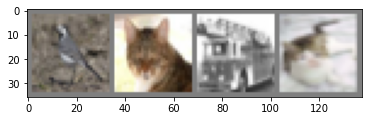

In [4]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize,cause channel_processed=(channel_real-0.5)/0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    #img(channels,imagesize,imagesize)
    #but imshow ask for the format(imagesize,imagesize,channels)
    #so use transpose to reshape the order

# get some random training images
dataiter = iter(trainloader) #make trainloader become an iterator
images, labels = dataiter.next() #next item,pay attention:labels not string, it is a index in classes list

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
import torch.nn as nn
import torch.nn.functional as F
class VGG16_torch(nn.Module):
    def __init__(self):
        super(VGG16_torch,self).__init__()

        # GROUP 1
        self.conv1_1 = nn.Conv2d(in_channels=3,out_channels=64,kernel_size=3,stride=1,padding=(1,1)) #output:32*32*64
        self.conv1_2 = nn.Conv2d(in_channels=64,out_channels=64 ,kernel_size=3,stride=1,padding=(1,1))#output:32*32*64
        self.maxpool1 = nn.MaxPool2d(2)#池化后长宽减半 output:16*16*64

        # GROUP 2
        self.conv2_1 = nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3,stride=1,padding=(1,1))#output:16*16*128
        self.conv2_2 = nn.Conv2d(in_channels=128,out_channels=128,kernel_size=3,stride=1,padding=(1,1))#output:16*16*128
        self.maxpool2 = nn.MaxPool2d(2)#池化后长宽减半 output:8*8*128

        # GROUP 3
        self.conv3_1 = nn.Conv2d(in_channels=128,out_channels=256,kernel_size=3,stride=1,padding=(1,1))#output:8*8*256
        self.conv3_2 = nn.Conv2d(in_channels=256,out_channels=256,kernel_size=3,stride=1,padding=(1,1))#output:8*8*256
        self.conv3_3 = nn.Conv2d(in_channels=256,out_channels=256,kernel_size=1,stride=1)#output:8*8*256
        self.maxpool3 = nn.MaxPool2d(2)  # 池化后长宽减半 output:4*4*256

        # GROUP 4
        self.conv4_1 = nn.Conv2d(in_channels=256,out_channels=512,kernel_size=3,stride=1,padding=1)#output:4*4*512
        self.conv4_2 = nn.Conv2d(in_channels=512,out_channels=512,kernel_size=3,stride=1,padding=1)#output:4*4*512
        self.conv4_3 = nn.Conv2d(in_channels=512,out_channels=512,kernel_size=1,stride=1)#output:4*4*512
        self.maxpool4 = nn.MaxPool2d(2)  # 池化后长宽减半 output:2*2*512

        # GROUP 5
        self.conv5_1 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1)  # output:14*14*512
        self.conv5_2 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1)  # output:14*14*512
        self.conv5_3 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=1, stride=1)  # output:14*14*512
        self.maxpool5 = nn.MaxPool2d(2)  # 池化后长宽减半 output:1*1*512

        self.fc1 = nn.Linear(in_features=512*1*1,out_features=256)
        self.fc2 = nn.Linear(in_features=256,out_features=256)
        self.fc3 = nn.Linear(in_features=256,out_features=10)

    #定义前向传播
    def forward(self,x):
        input_dimen = x.size(0)

        #GROUP 1
        output = self.conv1_1(x)
        output = F.relu(output)
        output = self.conv1_2(output)
        output = F.relu(output)
        output = self.maxpool1(output)

        #GROUP 2
        output = self.conv2_1(output)
        output = F.relu(output)
        output = self.conv2_2(output)
        output = F.relu(output)
        output = self.maxpool2(output)

        #GROUP 3
        output = self.conv3_1(output)
        output = F.relu(output)
        output = self.conv3_2(output)
        output = F.relu(output)
        output = self.conv3_3(output)
        output = F.relu(output)
        output = self.maxpool3(output)

        #GROUP 4
        output = self.conv4_1(output)
        output = F.relu(output)
        output = self.conv4_2(output)
        output = F.relu(output)
        output = self.conv4_3(output)
        output = F.relu(output)
        output = self.maxpool4(output)

        #GROUP 5
        output = self.conv5_1(output)
        output = F.relu(output)
        output = self.conv5_2(output)
        output = F.relu(output)
        output = self.conv5_3(output)
        output = F.relu(output)
        output = self.maxpool5(output)

        output = output.view(x.size(0),-1)

        output = self.fc1(output)
        output = self.fc2(output)
        output = self.fc3(output)
        
		#返回输出
        return output


In [8]:
epoch = 3 #训练次数
learning_rate = 1e-4 #学习率

net = VGG16_torch()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

for epoch in range(epoch):  #迭代
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        #初始化梯度
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 打印loss
        running_loss += loss.item()
        if i % 5000== 2000:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.5f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            break
print('Finished Training')


[1,  2001] loss: 2.28872
[2,  2001] loss: 1.98284
[3,  2001] loss: 1.88157
Finished Training


In [31]:
print(net)

VGG16_torch(
  (conv1_1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv1_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2_1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3_1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_3): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4_1): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4_2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4_3): 

GroundTruth:    cat  ship  ship plane


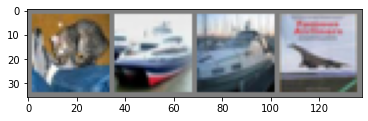

In [9]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
outputs = net(images)

In [11]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    dog  ship  ship  ship


In [12]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)#return the max number(which means the most probably class) in each row
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 24 %


In [13]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane :  1 %
Accuracy of   car :  4 %
Accuracy of  bird :  0 %
Accuracy of   cat :  2 %
Accuracy of  deer :  0 %
Accuracy of   dog : 67 %
Accuracy of  frog :  0 %
Accuracy of horse : 62 %
Accuracy of  ship : 61 %
Accuracy of truck : 48 %
